In [2]:
from IPython.external import mathjax; mathjax.install_mathjax()

Extracting to /Users/tomii/.ipython/nbextensions/mathjax


ReadError: unexpected end of data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [369]:
data_dir = "/Users/tomii/tmp/AnalysisResult/20160907-3/"
sess = 34
frame_start = 370
frame_end = 392

In [370]:
sess_dir = data_dir+"C001H001S{0:0>4}/".format(sess)
print sess_dir

/Users/tomii/tmp/AnalysisResult/20160907-3/C001H001S0034/


In [371]:
x = np.fromfile(sess_dir+"/core.log".format(sess), sep=' ')
x = x.reshape(x.shape[0]/4, 4)

if frames is not None:
    d = filter(lambda l:l[0] in [frame_start, frame_end], x)
for l in d: 
    for e in l:
        print "{0:.0f}, ".format(e),
    print

370,  9,  62,  78, 
370,  9,  81,  89, 
370,  9,  94,  88, 
392,  20,  55,  106, 
392,  9,  67,  92, 
392,  9,  109,  96, 


In [385]:
core_id = 9

In [373]:
d = filter(lambda l:l[1] == core_id, d)
for l in d: 
    for e in l:
        print "{0:.0f}, ".format(e),
    print

370,  9,  62,  78, 
370,  9,  81,  89, 
370,  9,  94,  88, 
392,  9,  67,  92, 
392,  9,  109,  96, 


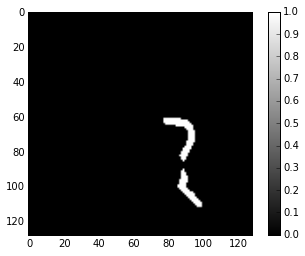

In [374]:
core_data = np.load(sess_dir+'/core.npy')
core_traj = (core_data[frame_start:frame_end+1,:,:] == core_id )*1
core_integ = np.sum( core_traj, axis=0)
plt.imshow((core_integ>0), cmap='gray')
plt.colorbar()
plt.show()

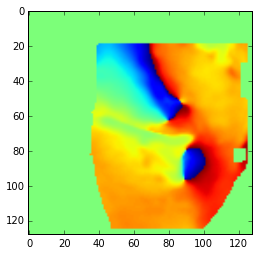

In [375]:
pmap_data = np.load(sess_dir+'/pmap.npy')
pmap_start = pmap_data[frame_start,:,:]
plt.imshow(pmap_start)
plt.show()

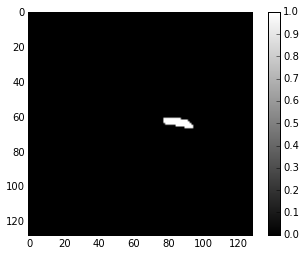

In [382]:
#core_integ[:35,:]= 0
core_integ[80:,:]= 0
#core_integ[:,:86]= 0
#core_integ[:,70:]= 0
plt.imshow((core_integ>0), cmap='gray')
plt.colorbar()
plt.savefig(sess_dir+"/core_integ.png")
plt.show()

In [383]:
core_index = np.array(np.where(core_integ>0)).T
shift_phase = np.array( [ pmap_start[p[0], p[1]] for p in core_index] )
np.save(sess_dir+"/shift_phase", shift_phase)

(69,)
mean 1.64352
div 2.24866


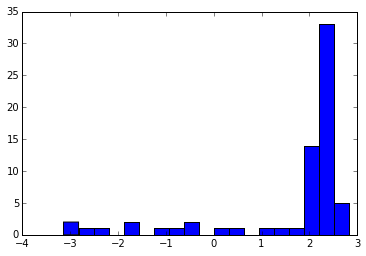

In [384]:
plt.hist(shift_phase, bins=np.arange(-np.pi, np.pi, np.pi*0.1))
plt.savefig(sess_dir+'shift_phase_hist.png')
print shift_phase.shape
print 'mean', np.mean(shift_phase)
print 'div', np.var(shift_phase)